In [3]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import math as mth

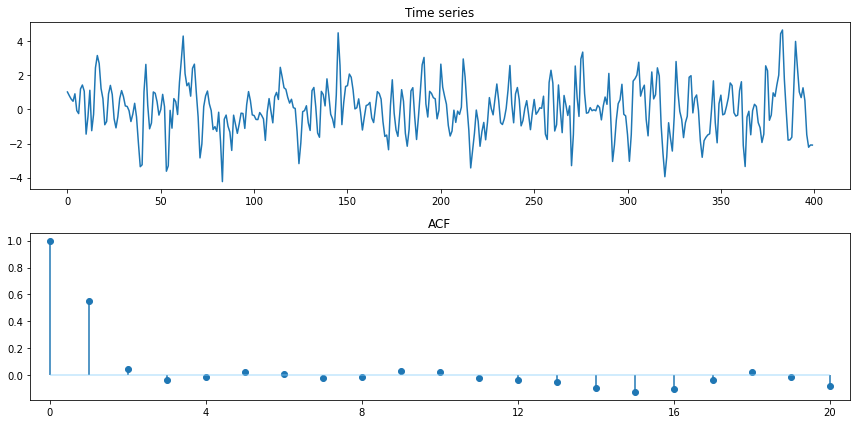

In [18]:
# (2.2.6)

def plot_ts_acf(X, nlags = 20, figsize = (12, 6)):

    fig, axes = plt.subplots(2, 1, figsize = figsize)
    x = range(nlags + 1)
    acf = sm.tsa.acf(X, nlags = nlags)
    titles = ["Time series", "ACF"]

    axes[0].plot(range(len(X)), X)
    axes[1].scatter(x, acf)
    axes[1].vlines(x, 0, acf, color = "tab:blue")
    axes[1].hlines(0, 0, nlags, color = "lightskyblue", alpha  =0.5)
    axes[1].set_xlim(-0.5, nlags + 0.5)
    axes[1].set_xticks([i * 4 for i in range(mth.floor(nlags/4) + 1)])
    for (i, ax) in enumerate(axes):
        ax.set_title(titles[i])
    fig.tight_layout()
    plt.show()

# Only (a) is causal. 
np.random.seed(457334)

arma = sm.tsa.ArmaProcess(ar = [1.0, -0.1], ma = [1.0, 0.9])
X = arma.generate_sample(nsample = 800)
plot_ts_acf(X[400:])